<a href="https://colab.research.google.com/github/conormooney98/NBA-Predictive-Analytics/blob/main/Random_Forest_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Random Forest Model

##Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from matplotlib import rcParams
import warnings

warnings.filterwarnings("ignore")

# Figure size in inches
rcParams["figure.figsize"] = 10, 6
np.random.seed(42)

## Load Dataset

In [ ]:
# Load dataset
data = pd.read_csv("NBAdata5new.csv")

In [ ]:
# Show columns
data.columns

Index(['TEAM', 'Date', 'WL', 'HA', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%',
       'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO',
       'PF', 'PTS', '+/-'],
      dtype='object')

## Data Preprocessing

In [ ]:
# Split data into input and taget variable(s)

data['TEAM'] = data['TEAM'].astype('category')
data['enc_Team'] = data['TEAM'].cat.codes
data1 = data
X=data.drop(labels=['WL','TEAM','Date', '+/-'], axis=1)
y = data["WL"]

In [ ]:
# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify=y, test_size=0.2, random_state=0
)

## Create Random Forest Model

In [ ]:
# Create the classifier

# Optimal number of estimators from cross validation
n_estimators=24
max_depth=50
random_state=10

classifier = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)

# Train the model using the training sets
classifier.fit(X, y)

RandomForestClassifier(max_depth=50, n_estimators=24, random_state=10)

In [ ]:
# Predicting on the test set
y_pred = classifier.predict(X_test)

In [ ]:
# Calculate Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.5


In [ ]:
# Check Important features
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": classifier.feature_importances_}
).sort_values("importance", ascending=False)

# Display
feature_importances_df

,feature,importance
3,FG%,0.131521
11,DREB,0.102076
1,FGM,0.090594
6,3P%,0.083013
18,PTS,0.073603
12,REB,0.071176
13,AST,0.059799
14,STL,0.044081
9,FT%,0.043601
2,FGA,0.041861


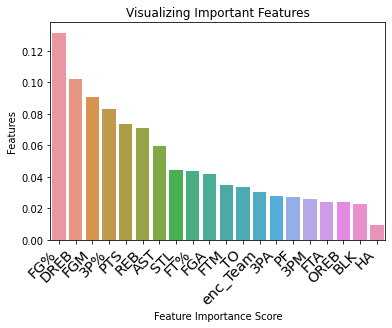

In [ ]:
# Visualize important features

# Creating a bar plot
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)

# Add labels to the plot
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()

## Generating the Classifier on Selected Features

In [ ]:
# Load data with selected features
y = data1["WL"]

feature_cols = ['FG%', 'DREB', 'FTM', 'PTS', 'REB', 'AST', '3P%', 'FT%', 'STL', 'FGA', 'TO', 'BLK', 'HA']
X = data1[feature_cols]
# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify=y, test_size=0.20, random_state=22
)

In [ ]:
# Create a Random Classifier
clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)

# Train the model using the training sets
clf.fit(X_train, y_train)

# Prediction on test set
y_pred = clf.predict(X_test)

# Calculate Model Accuracy,
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.82


In [ ]:
# Import evaluation metrics and call results
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

auc = accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1= f1_score(y_test, y_pred)
print("n_estimators=",n_estimators," max_depth=",max_depth, "random_state=" ,random_state)
print("Accuracy :", round(auc,2))
print("Precision :", round(precision,2))
print("Recall :", round(recall,2))
print("F1 :", round(f1,2))

yhat= y_pred

[[43  7]
 [11 39]]
n_estimators= 24  max_depth= 50 random_state= 10
Accuracy : 0.82
Precision : 0.85
Recall : 0.78
F1 : 0.81


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.0f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[39 11]
 [ 7 43]]


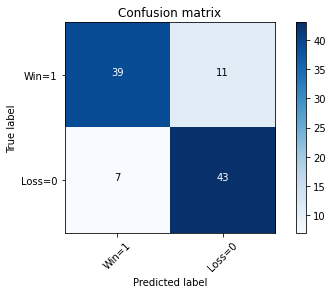

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Win=1','Loss=0'],  title='Confusion matrix')

In [ ]:
#Cross Validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

max_num= 30

mean_acc=np.zeros((max_num-1))
std_acc=np.zeros((max_num-1))
cv = KFold(n_splits=5, random_state=1, shuffle=True)

max_depth=50
random_state=10

for n in range(1, max_num):
    classifier = RandomForestClassifier(n_estimators=n, max_depth=max_depth, random_state=random_state)
    scores = cross_val_score(classifier, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    mean_acc[n-1]= mean(scores)
    std_acc[n-1]= std(scores)

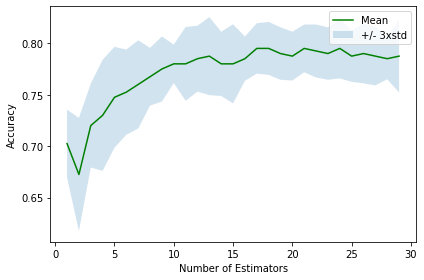

In [ ]:
#Lets visualize what we have done
plt.plot(range(1,max_num),mean_acc,'g')
plt.fill_between(range(1,max_num),mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.2)
plt.legend(('Mean', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Estimators')
plt.tight_layout()
plt.show()

In [ ]:
print("The best accuracy was with",mean_acc.max(), "with n=",mean_acc.argmax()+1)

The best accuracy was with 0.7950000000000002 with n= 24
